In [111]:

import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm



In [132]:
df_4 = pd.read_csv("C://Users//yinzh/Desktop//CANDEV//Data//Years//1997//Form4.csv", encoding = "ISO-8859-1")
df_41 = df_4.fillna(0)
df_5 = pd.read_csv("http://www.esdc.gc.ca/ouvert-open/labour-travail/leep/2019/Form4.csv", encoding = "ISO-8859-1")
df_51 = df_5.fillna(0)
df_6 = pd.read_csv("http://www.esdc.gc.ca/ouvert-open/labour-travail/leep/2008/Form4.csv", encoding = "ISO-8859-1")
df_61 = df_6.fillna(0)

In [125]:


df_4ex = df_41.loc[df_41['OCCGROUP'].isin(['Supervisors', 'Senior Managers',"Middle and Other Managers"])]
dt = df_4ex.drop(df_4ex[df_4ex.GEOGRAPHY == "Provincial"].index)
dtnew = dt.groupby("EMPLOYERNAME").sum()
dtnew["pctab+pwd+visex"] =(dtnew["ABORIGALLCOUNT"] + dtnew["PWDALLCOUNT"] + dtnew["VISMINALLCOUNT"])/ dtnew["ALLCOUNT"]*100

df_41 = df_41.drop(df_41[df_41.GEOGRAPHY == "Provincial"].index)
df4final = df_41.loc[df_41["OCCGROUP"] ==  "Overall"].groupby("EMPLOYERNAME").sum()
df4final["pctall"] = (df4final["ABORIGALLCOUNT"] + df4final["PWDALLCOUNT"] 
                      + df4final["VISMINALLCOUNT"])/ df4final["ALLCOUNT"]*100


In [128]:
df_5ex = df_51.loc[df_51['OCCGROUP'].isin(['Supervisors', 'Senior Managers',"Middle and Other Managers"])]
dt5 = df_5ex.drop(df_5ex[df_5ex.GEOGRAPHY == "Provincial"].index)
dtnew5 = dt5.groupby("EMPLOYERNAME").sum()
dtnew5["pctab+pwd+visex"] =(dtnew5["ABORIGALLCOUNT"] + dtnew5["PWDALLCOUNT"] + dtnew5["VISMINALLCOUNT"])/ dtnew5["ALLCOUNT"]*100


df_51 = df_51.drop(df_51[df_51.GEOGRAPHY == "Provincial"].index)
df5final = df_51.loc[df_51["OCCGROUP"] ==  "Overall"].groupby("EMPLOYERNAME").sum()
df5final["pctall"] = (df5final["ABORIGALLCOUNT"] + df5final["PWDALLCOUNT"] 
                      + df5final["VISMINALLCOUNT"])/ df5final["ALLCOUNT"]*100

In [133]:
df_6ex = df_61.loc[df_61['OCCGROUP'].isin(['Supervisors', 'Senior Managers',"Middle and Other Managers"])]
dt6 = df_6ex.drop(df_6ex[df_6ex.GEOGRAPHY == "Provincial"].index)
dtnew6 = dt6.groupby("EMPLOYERNAME").sum()
dtnew6["pctab+pwd+visex"] =(dtnew6["ABORIGALLCOUNT"] + dtnew6["PWDALLCOUNT"] + dtnew6["VISMINALLCOUNT"])/ dtnew6["ALLCOUNT"]*100

df_61 = df_61.drop(df_61[df_61.GEOGRAPHY == "Provincial"].index)
df6final = df_61.loc[df_61["OCCGROUP"] ==  "Overall"].groupby("EMPLOYERNAME").sum()
df6final["pctall"] = (df6final["ABORIGALLCOUNT"] + df6final["PWDALLCOUNT"] 
                      + df6final["VISMINALLCOUNT"])/ df6final["ALLCOUNT"]*100

In [135]:

#df_411["pctallab+pwd+vi"] = (df_411["ABORIGALLCOUNT"] + df_411["PWDALLCOUNT"] +
                             #df_411["VISMINALLCOUNT"])/ df_411["ALLCOUNT"]*100

final1997 = pd.concat([df4final, dtnew], sort = False, axis = 1)
deffinal1997 = final1997.dropna()
final2019 = pd.concat([df5final, dtnew5], sort = False, axis = 1)
deffinal2019 = final2019.dropna()
final2008 = pd.concat([df6final, dtnew6], sort = False, axis = 1)
deffinal2008 = final2008.dropna()

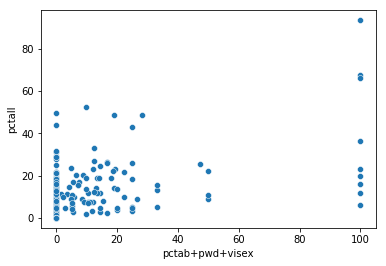

In [112]:
sns.scatterplot(data = deffinal1997, x= "pctab+pwd+visex", y ="pctall")

In [114]:
deffinal1997["pctall"].corr(deffinal1997["pctab+pwd+visex"])

0.49077123856488974

Text(0.5, 1.0, '1997, correlation of 0.49')

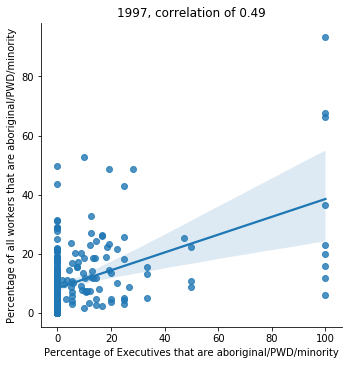

In [140]:
sns.lmplot(x="pctab+pwd+visex", y="pctall", data=deffinal1997, )
plt.xlabel("Percentage of Executives that are aboriginal/PWD/minority")
plt.ylabel("Percentage of all workers that are aboriginal/PWD/minority")
plt.title("1997, correlation of 0.49")

0.5714384932512615

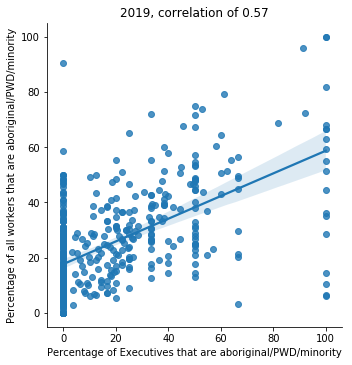

In [141]:
sns.lmplot(x="pctab+pwd+visex", y="pctall", data=deffinal2019, )
plt.xlabel("Percentage of Executives that are aboriginal/PWD/minority")
plt.ylabel("Percentage of all workers that are aboriginal/PWD/minority")
plt.title("2019, correlation of 0.57")
deffinal2019["pctall"].corr(deffinal2019["pctab+pwd+visex"])

Text(0.5, 1.0, '2008, correlation of 0.44')

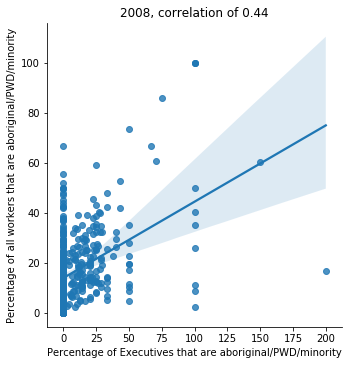

In [142]:
sns.lmplot(x="pctab+pwd+visex", y="pctall", data= deffinal2008)
plt.xlabel("Percentage of Executives that are aboriginal/PWD/minority")
plt.ylabel("Percentage of all workers that are aboriginal/PWD/minority")
deffinal2008["pctall"].corr(deffinal2008["pctab+pwd+visex"])
plt.title("2008, correlation of 0.44")